In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
# load a dataset
tips = sns.load_dataset("tips")

In [3]:
flights = sm.datasets.get_rdataset("flights", "nycflights13").data
weather = sm.datasets.get_rdataset("weather", "nycflights13").data

weather.drop_duplicates(subset=["origin", "year", "month", "day", "hour"], inplace=True)

In [4]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)

총점 225

### A-1. (5)

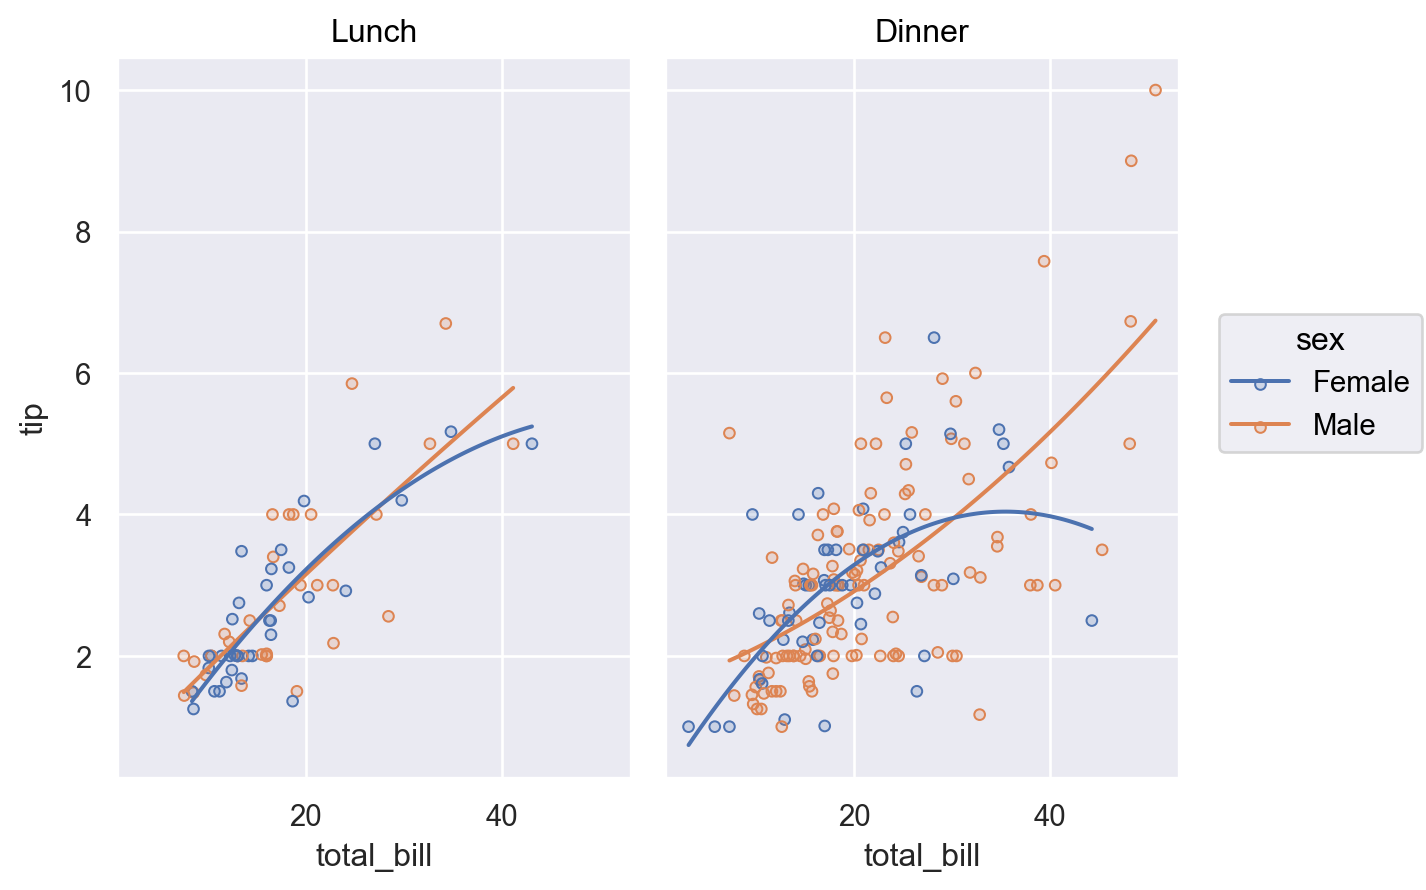

In [5]:
(
    so.Plot(tips, x="total_bill", y="tip", color = 'sex')
    .add(so.Dots(), color = 'sex') 
    .facet('time')
    .add(so.Line(), so.PolyFit(2))
)

### A-2. (10) 

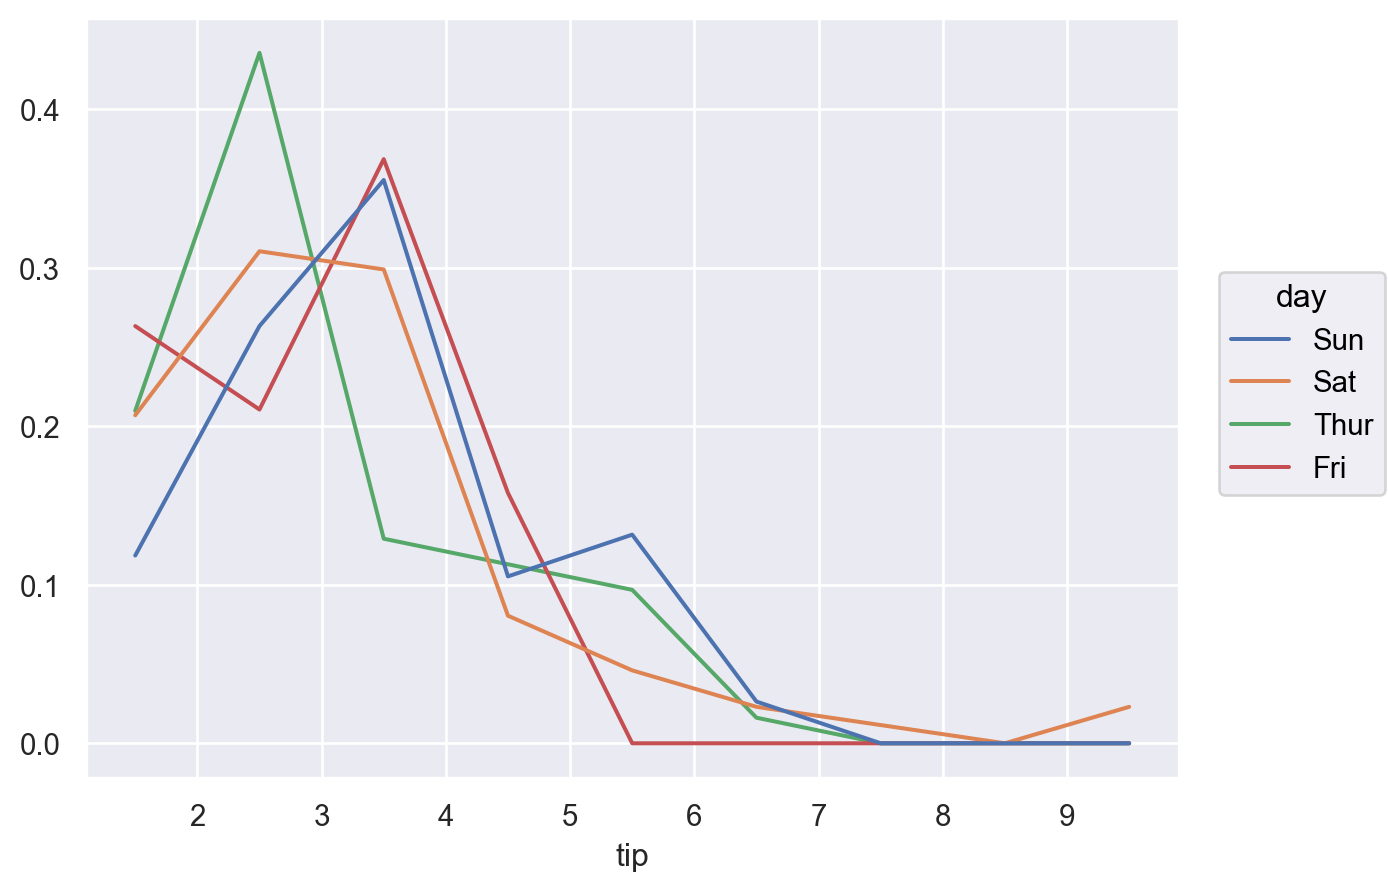

In [6]:
(
    so.Plot(tips, x="tip", color = 'day')
    .add(so.Line(), so.Hist("proportion", binwidth=1, common_norm=False))  # binwidth vs. bins
)

### A-3. (10)

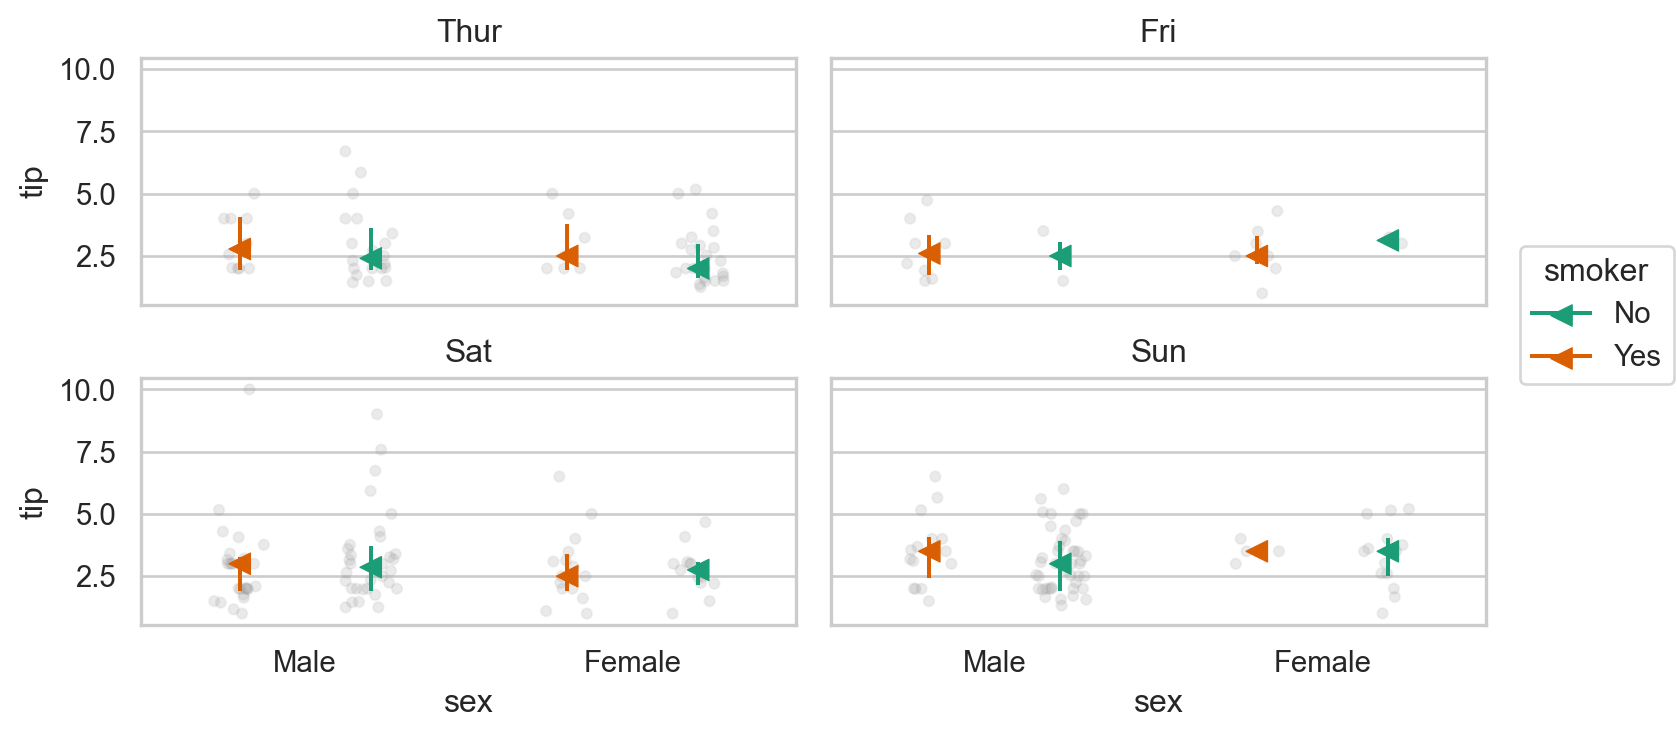

In [7]:
def boxplot(df, x, y, color=None, alpha=0.1, marker="<"):
    
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".6"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dot(pointsize=8, marker=marker), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

(
    boxplot(tips, x="sex", y="tip", color="smoker")
    .facet("day", wrap = 2)
    .layout(size=(8, 4))
)

### A-4. 1) (5)

In [8]:
tip_m = (
    tips.groupby('day').agg(mean=('tip', 'mean'),median=('tip', 'median'), count =('tip', 'count'))
)
tip_m

C:\Users\ygeun\AppData\Local\Temp\ipykernel_7044\3299474707.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day').agg(mean=('tip', 'mean'),median=('tip', 'median'), count =('tip', 'count'))


,mean,median,count
day,,,
Thur,2.77,2.30,62
Fri,2.73,3.00,19
Sat,2.99,2.75,87
Sun,3.26,3.15,76


### A-4. 2) (15)

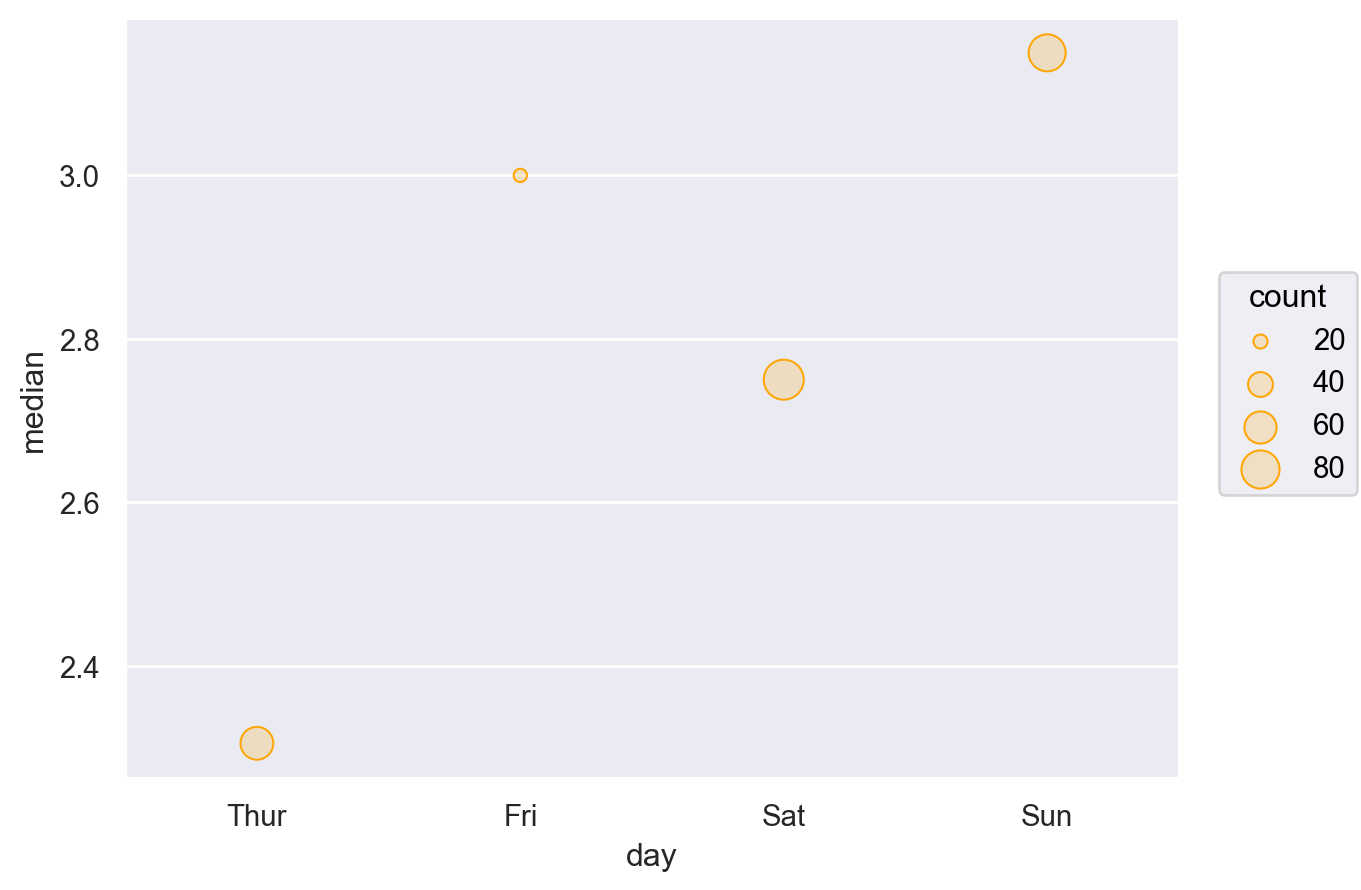

In [9]:
(
    so.Plot(tip_m, x="day", y = 'median', pointsize='count')
    .add(so.Dots(color = 'orange'))
    .scale(pointsize=(5, 15))
)

목요일에 median과 mean이 다른 요일에 비해 큰 차이가 나는데 그 의미를 팁을 어떻게 받았을지를 고려해서 기술해보세요.

팁을 받은 것의 평균이 중앙값보다 훨씬 크다. 이는 목요일날 많이 받는 사람들이 적고, 적게 받는 사람이 몰려있음을 알 수 있다.

### A-5. 1) (5)

In [10]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
tips["tip_per_person"] = tips["tip"] / (tips["size"])
tips

,total_bill,tip,sex,smoker,day,time,size,weekend,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,True,0.51
1,10.34,1.66,Male,No,Sun,Dinner,3,True,0.55
2,21.01,3.50,Male,No,Sun,Dinner,3,True,1.17
...,...,...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2,True,1.00
242,17.82,1.75,Male,No,Sat,Dinner,2,True,0.88
243,18.78,3.00,Female,No,Thur,Dinner,2,False,1.50


### A-5. 2) (5)

In [11]:
tip_x = (
    tips.groupby(['weekend','time', 'size']).agg(mean_tip_pp=('tip_per_person', 'mean')).reset_index()
)

tip_x

C:\Users\ygeun\AppData\Local\Temp\ipykernel_7044\2528122608.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['weekend','time', 'size']).agg(mean_tip_pp=('tip_per_person', 'mean')).reset_index()


,weekend,time,size,mean_tip_pp
0,False,Lunch,1,1.88
1,False,Lunch,2,1.21
2,False,Lunch,3,0.92
...,...,...,...,...
21,True,Dinner,4,1.03
22,True,Dinner,5,0.76
23,True,Dinner,6,0.83


### A-5. 3) (10)

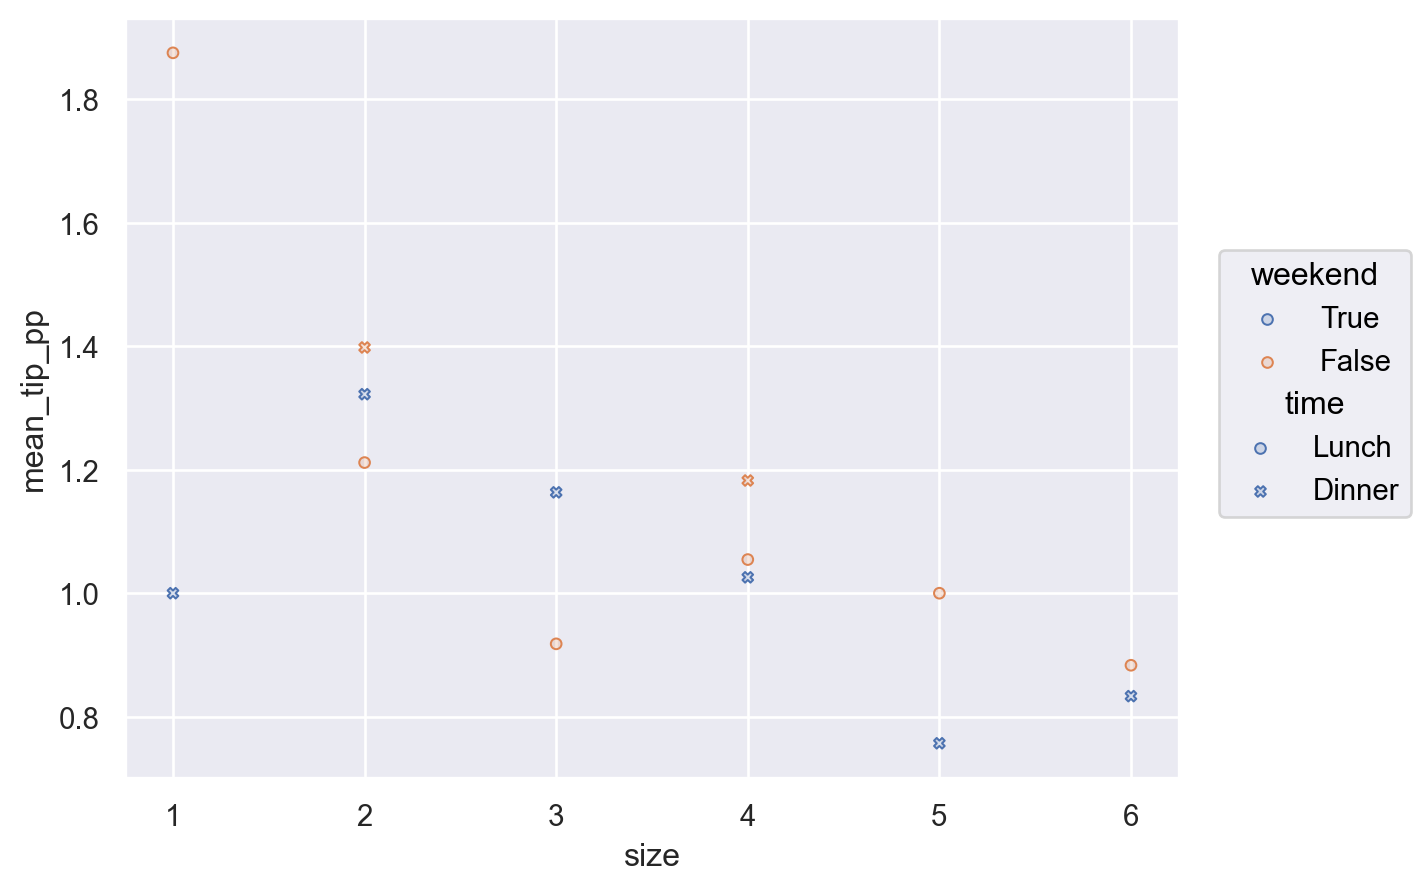

In [12]:
(
    so.Plot(tip_x, x = 'size', y = 'mean_tip_pp', color = 'weekend', marker = 'time')
    .add(so.Dots())
)

이 플랏에서 발견되는 패턴에 대해 간단히 언급하고, 결론을 기술해보세요.

weekend가 False인 날이 대략적으로 더 mean_tip_pp가 높다.
하지만 table size가 5 이상이 되면 True인 날이 더 mean_tip_pp가 더 높아진다.
테이블 사이즈가 적당하거나 적은 경우가 더 인당 tip을 높게 받을 수 있다

### B-1. (15)

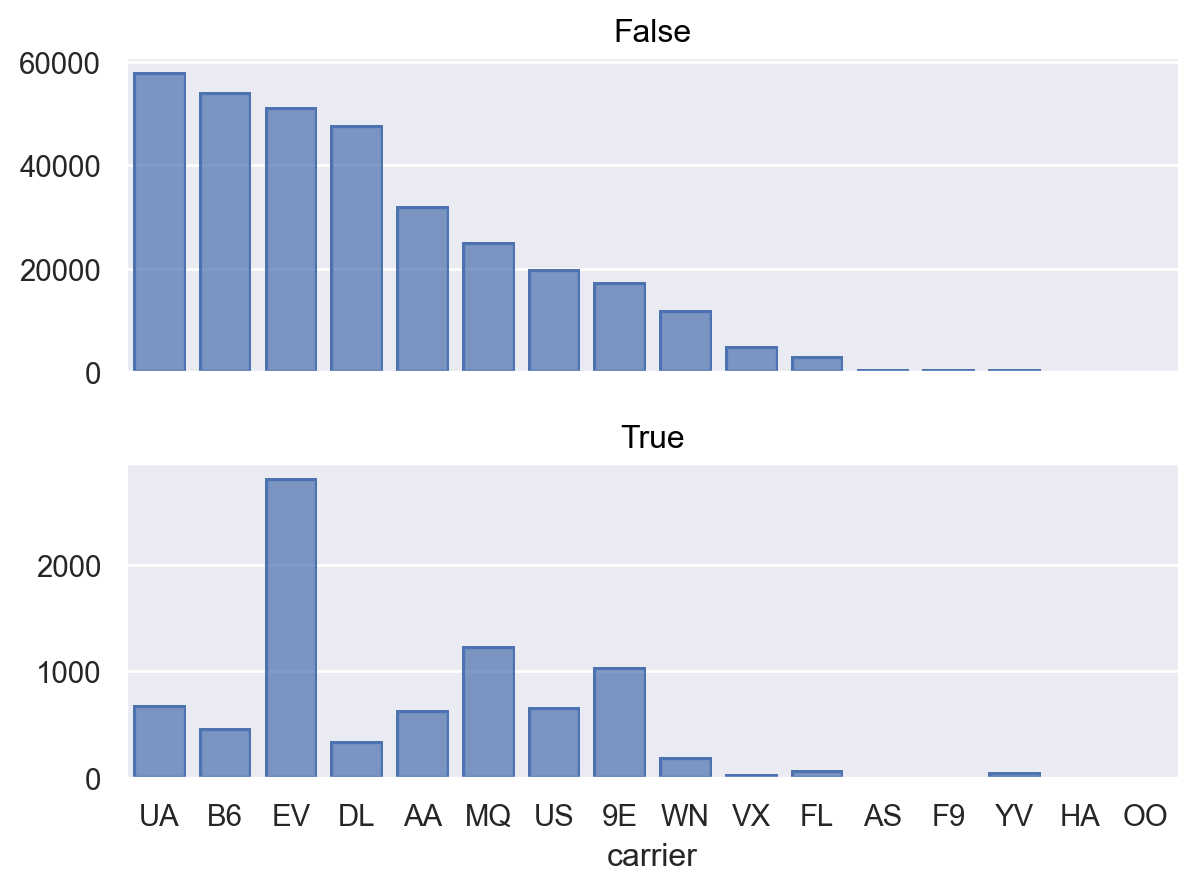

In [13]:
flights["cancel"] = flights["dep_delay"].isna()

reorder = flights.groupby('carrier').size().sort_values(ascending=False).index.values

(
    so.Plot(flights, x="carrier")
    .add(so.Bar(), so.Count())
    .facet(row = 'cancel')
    .share(y= False)
    .scale(x=so.Nominal(order=reorder)) 
)

### B-2. 1) (10)

In [14]:
# cancle = True인 것들 중에서 개수가 많은 3개
flights[flights['cancel'] == True].groupby('carrier').size().sort_values(ascending=False).head(3).index.values

# 이 3개의 포함되는 filghts
flights_3= flights[flights['carrier'].isin(flights[flights['cancel'] == True].groupby('carrier').size().sort_values(ascending=False).head(3).index.values)]

flights_3["late"] = flights_3["arr_delay"] > 30

flights_delay = flights_3.groupby(['carrier', 'month', 'hour']).agg(mean_delay_rate = ('late', 'mean')).reset_index()
flights_delay

,carrier,month,hour,mean_delay_rate
0,9E,1,6,0.12
1,9E,1,7,0.10
2,9E,1,8,0.10
...,...,...,...,...
572,MQ,12,19,0.26
573,MQ,12,20,0.33
574,MQ,12,21,0.21


### B-2. 2) (10)

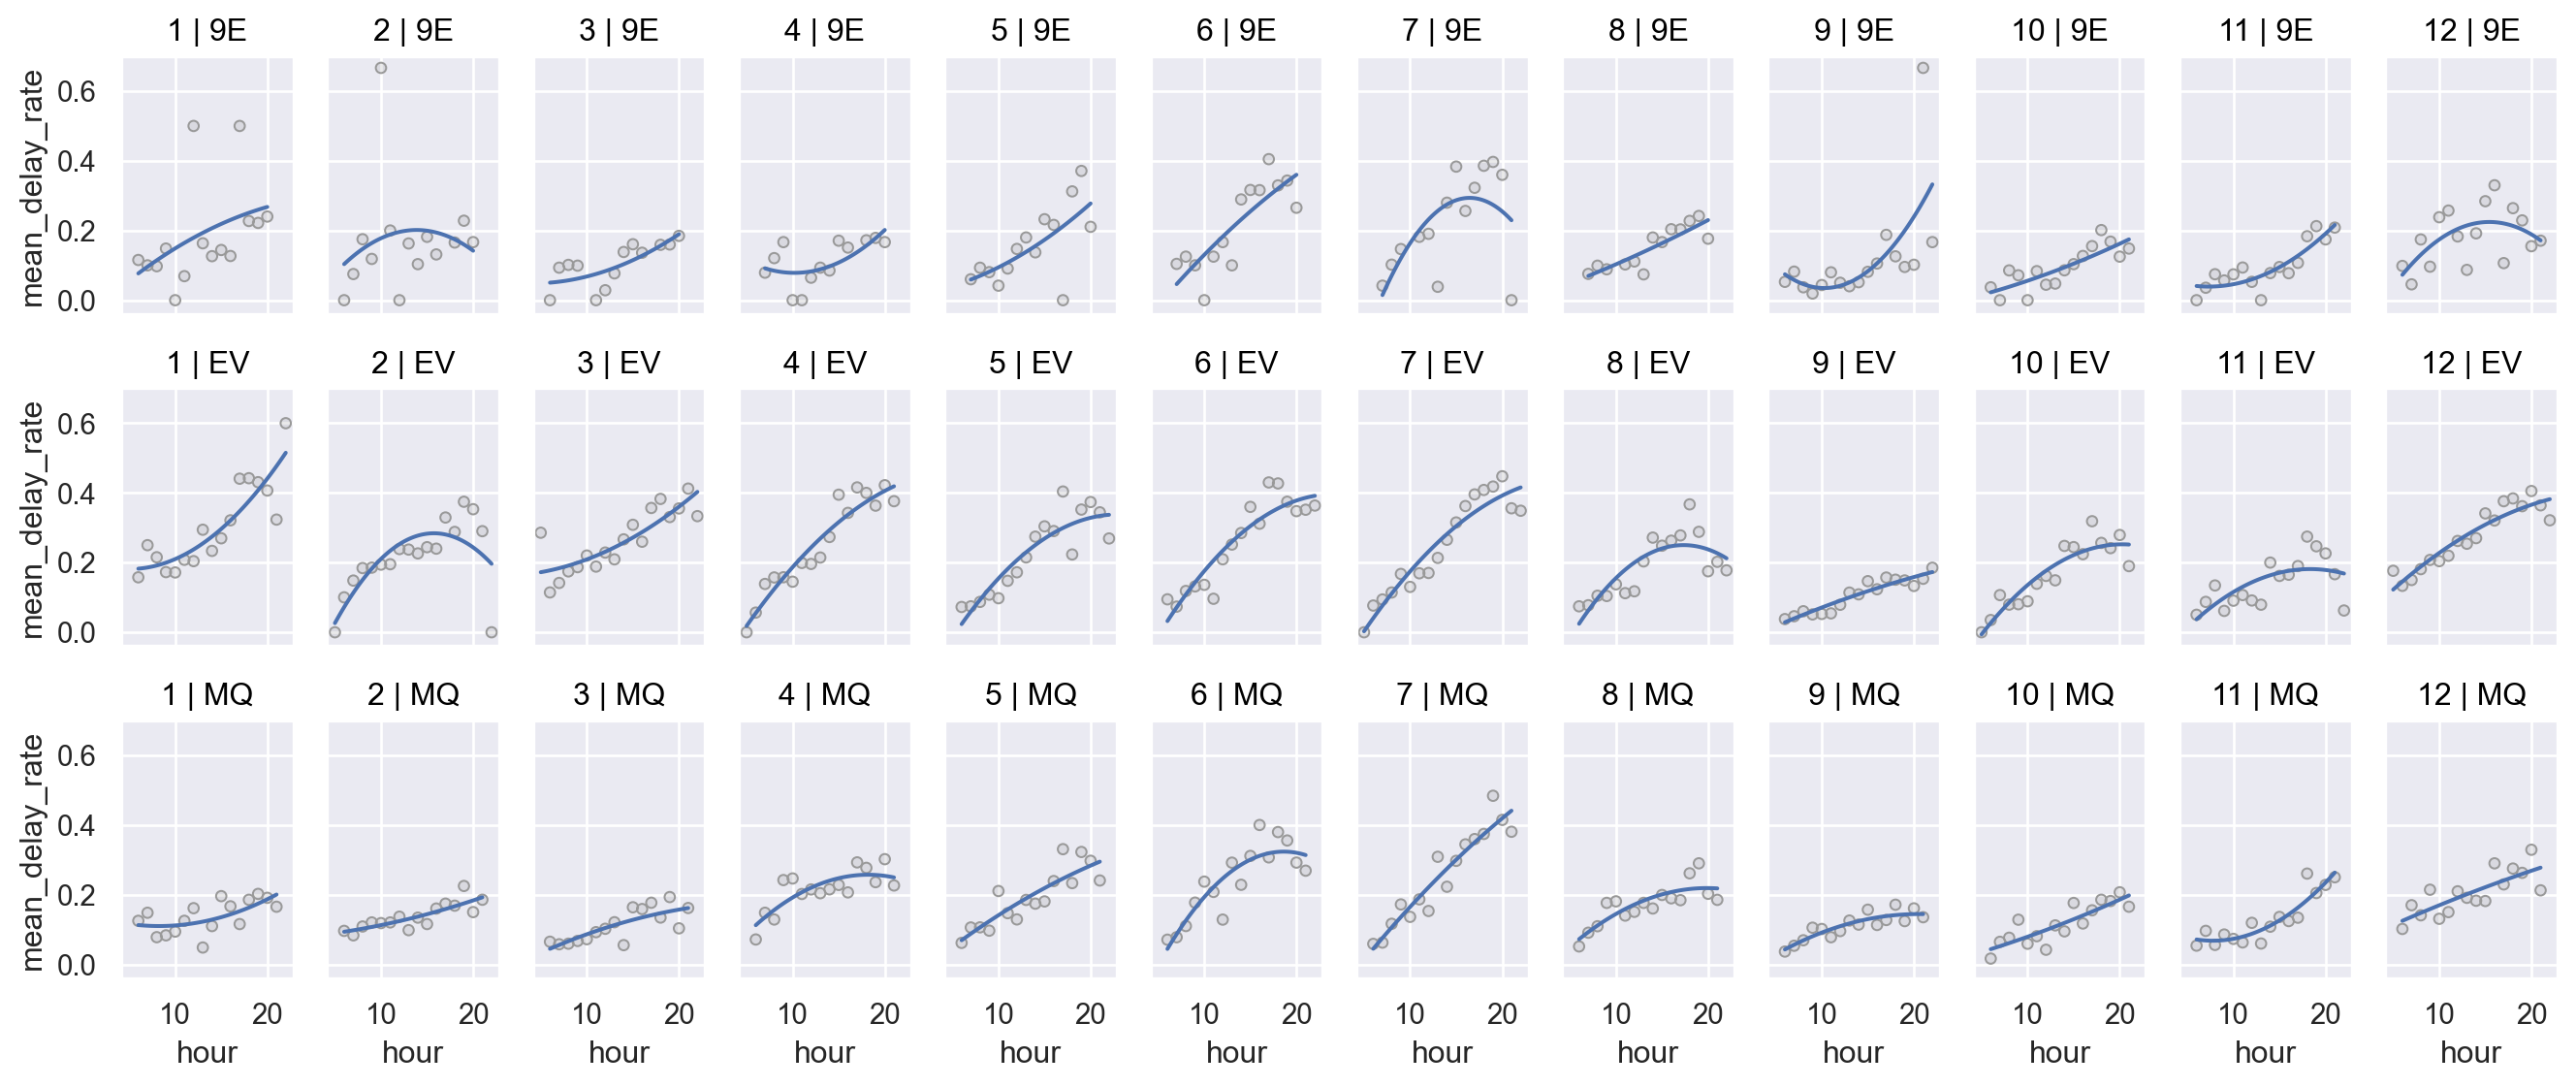

In [15]:
(
    so.Plot(flights_delay, x = 'hour', y = 'mean_delay_rate')
    .add(so.Dots(color=".6"))
    .add(so.Line(), so.PolyFit(2))
    .facet(col = 'month', row = 'carrier')
    .layout(size=(14, 6))
)

눈에 띄는 패턴에 대해 “대략” 기술해보세요. (하루 중 시간이 지남에 따라 지연율이 증가하는 경향을 중심으로) 

대부분 달, 항공편 상관없이 시간이 늦어짐에 따라 지연율이 증가한다.

### B-3. 1) (10)

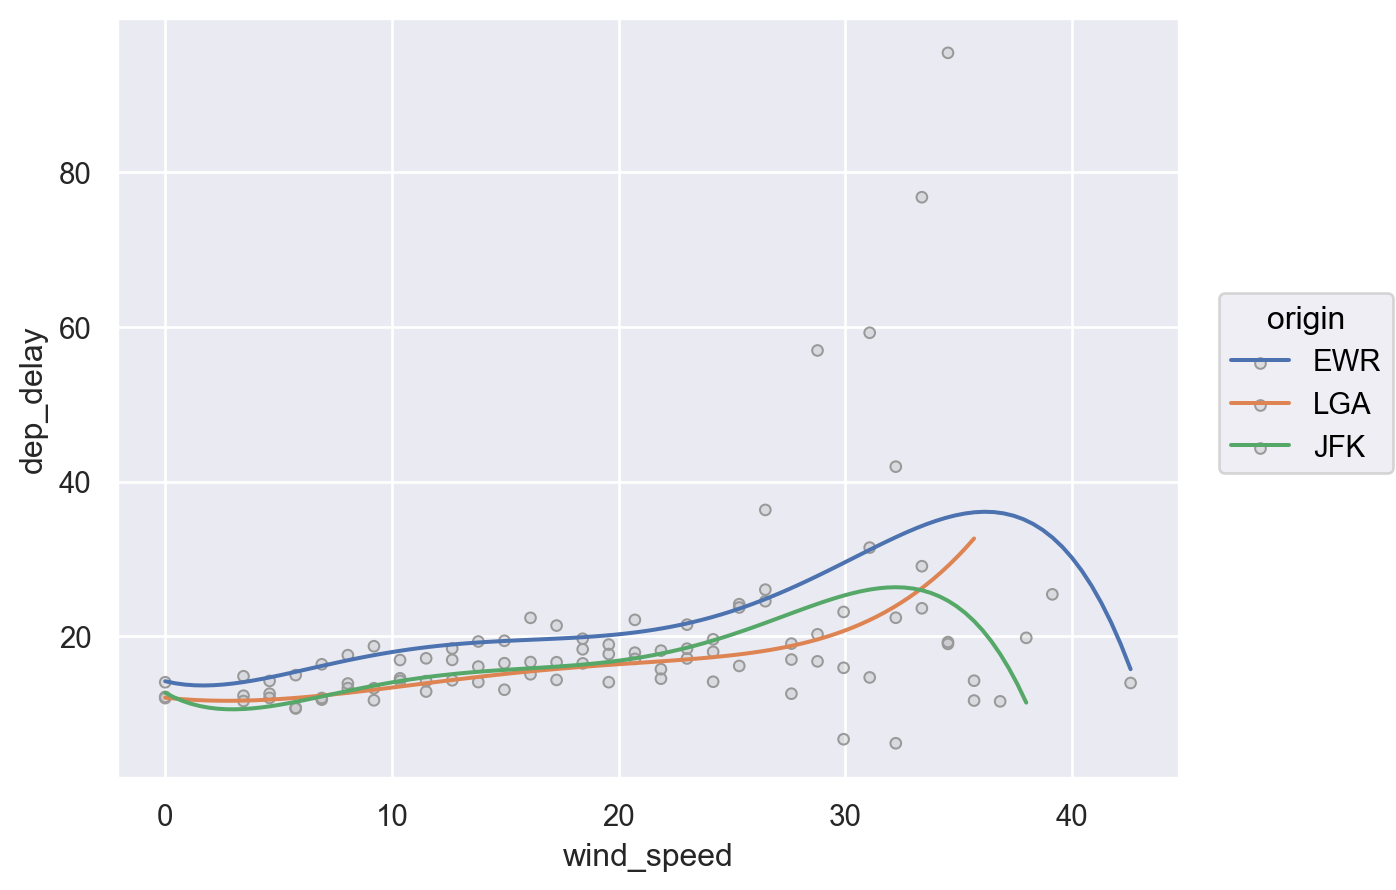

In [16]:
# flights와 weather 데이터를 default인 inner방식으로 merge하여 flights_weather 변수명로 저
flights_weather = flights.merge(weather, on = ['origin', 'year', 'month', 'day', 'hour'])
flights_weather.loc[flights_weather['dep_delay'] < 0, 'dep_delay'] = 0

(
    so.Plot(flights_weather, x = 'wind_speed', y = 'dep_delay', color = 'origin')
    .add(so.Dots(color=".6"), so.Agg('mean'))
    .add(so.Line(), so.PolyFit(5))
)

### B-3. 2) (5)

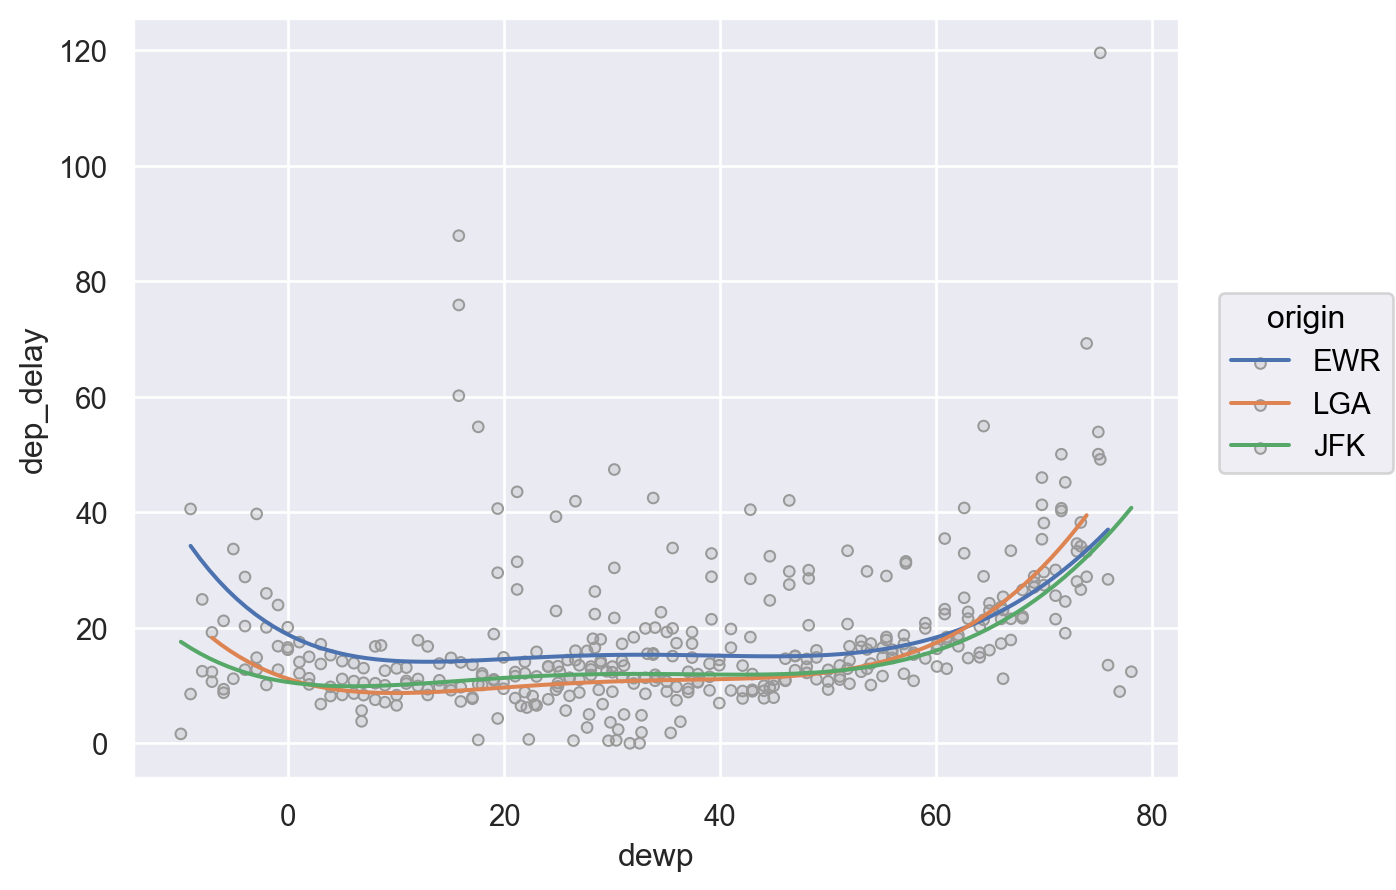

In [17]:
(
    so.Plot(flights_weather, x = 'dewp', y = 'dep_delay', color = 'origin')
    .add(so.Dots(color=".6"), so.Agg('mean'))
    .add(so.Line(), so.PolyFit(5))
)

### B-3. 3) (10)

In [18]:
#  flights_weather 테이블에서 출발지(origin)와 바람의 세기(wind_speed)에 따른 dep_delay의 평균값들을 구한다
flights_mean = flights_weather.groupby(['origin', 'wind_speed']).agg(mean_delay_rate = ('dep_delay', 'mean')).reset_index()

# 그 값이 50이상인 경우에 해당하는 경우로만 weather 테이블을 필터링
flights_mean = flights_mean[flights_mean['mean_delay_rate'] >= 50]


flights_mean = flights_mean.merge(weather, on = ['origin', 'wind_speed'])
flights_mean =flights_mean[['origin', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']]
flights_mean

,origin,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,1,24,13,24.08,-7.06,24.57,330.00,28.77,40.28,0.00,1024.00,10.00
1,EWR,1,31,17,35.96,12.92,38.20,260.00,28.77,43.73,0.00,1004.50,10.00
2,EWR,1,31,21,32.00,10.04,39.38,260.00,28.77,36.82,0.00,1008.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,JFK,11,10,13,59.00,28.94,31.68,270.00,31.07,40.28,0.00,1010.30,10.00
18,LGA,2,17,18,24.98,3.92,39.78,310.00,33.37,43.73,0.00,1011.20,10.00
19,LGA,4,10,19,60.08,53.06,77.59,310.00,33.37,NaN,0.14,NaN,7.00


### B-3. 4) (5)

In [19]:
# 이제 3)에서 얻은 테이블로 다음과 같이 출발지(origin)에 따른 각 기상정보들에 대한 평균값을 구하낟
flights_a = flights_mean.groupby('origin').mean()

# tag 컬럼을 추가하여, severe로 모두 표기하세요.
flights_a['tag'] = 'severe'
flights_a

,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,tag
origin,,,,,,,,,,,,,
EWR,3.40,16.70,16.50,40.75,22.62,51.84,187.00,29.34,40.28,0.01,1013.24,9.80,severe
JFK,3.88,14.25,16.62,49.89,39.45,71.75,145.00,31.07,42.41,0.02,1007.58,8.44,severe
LGA,3.00,13.50,18.50,42.53,28.49,58.69,310.00,33.37,43.73,0.07,1011.20,8.50,severe


### B-3. 5) (5)

In [20]:
flights_b = flights_weather[['origin', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']].groupby('origin').mean()
flights_b['tag'] = 'overall'
flights_b

,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,tag
origin,,,,,,,,,,,,,
EWR,6.47,15.66,12.95,57.42,41.87,59.47,199.39,10.05,23.93,0.01,1017.76,9.24,overall
JFK,6.48,15.69,13.73,56.19,42.18,62.34,204.68,12.23,27.67,0.00,1018.07,9.22,overall
LGA,6.65,15.66,12.84,57.37,40.78,56.70,200.59,11.15,24.86,0.00,1017.59,9.31,overall


### B-3. 6) (20)

In [21]:
flights_ab = pd.concat([flights_a, flights_b])

플랏을 보고, 눈에 띄는 점을 간략히 기술해보세요.

### C-1. (10)

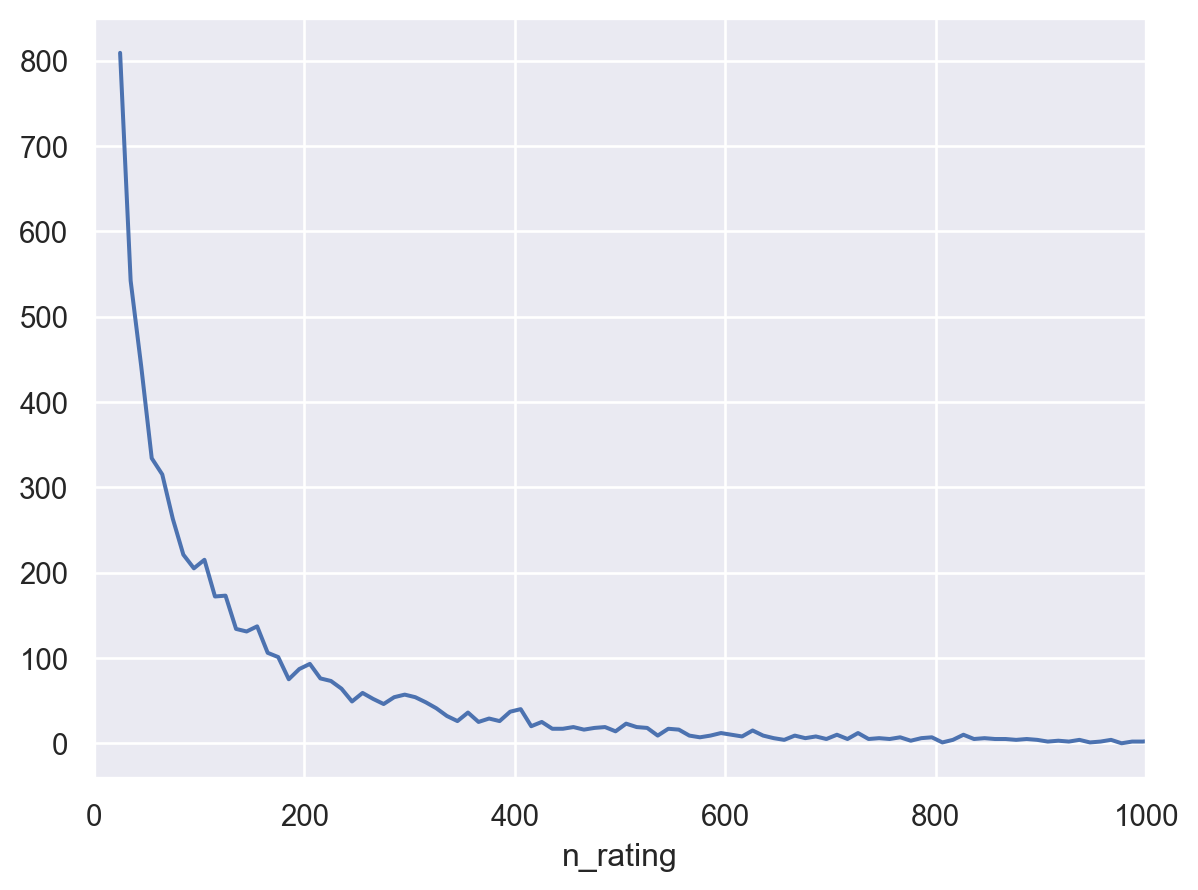

In [22]:
ratings_count = ratings.groupby('user_id').size().reset_index(name='n_rating')

(
    so.Plot(ratings_count, x = 'n_rating')
    .add(so.Line(), so.Hist(binwidth=10))  # Line에 maker "."을 표시
    .limit(x = [0,1000])
)

### C-2. (10)

In [23]:
ratings_count = ratings.groupby('user_id').size().reset_index(name='n_rating')

ratings_count = ratings_count[ratings_count['n_rating'] >= 30]

# rating과 merge
ratings_count = ratings_count.merge(ratings, on = 'user_id')


# user_id 별 평균과 표준편차로 정규화
ratings_count['mean'] = ratings_count.groupby('user_id')['rating'].transform('mean')
ratings_count['std'] = ratings_count.groupby('user_id')['rating'].transform('std')

ratings_count['rating_z'] = (ratings_count['rating'] - ratings_count['mean']) / ratings_count['std']

ratings_count.drop(['mean', 'std'], axis=1, inplace=True)
ratings_count

,user_id,n_rating,movie_id,rating,timestamp,rating_z
0,1,53,1193,5,978300760,1.19
1,1,53,661,3,978302109,-1.75
2,1,53,914,3,978301968,-1.75
...,...,...,...,...,...,...
982037,6040,341,562,5,956704746,1.21
982038,6040,341,1096,4,956715648,0.36
982039,6040,341,1097,4,956715569,0.36


### C-3. (10)

In [24]:
user_ratings = ratings_count.merge(users, on = 'user_id')

user_ratings.groupby(['movie_id', 'gender']).agg(mean_rating_z = ('rating_z', 'mean')).reset_index()

,movie_id,gender,mean_rating_z
0,1,F,0.49
1,1,M,0.47
2,2,F,-0.29
...,...,...,...
7139,3951,M,0.49
7140,3952,F,0.16
7141,3952,M,0.17


### C-4. (10)

In [29]:
movies_long = movies.copy()
movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

In [32]:

user_movies = user_ratings.merge(movies_long, on = 'movie_id')
user_movies

user_movies['rank'] = user_movies.groupby(['movie_id', 'gender'])['rating_z'].rank(ascending=False, method= 'min')
user_movies

,user_id,n_rating,movie_id,rating,timestamp,rating_z,gender,age,occupation,zip,title,genres,rank
0,1,53,1193,5,978300760,1.19,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,101.00
1,2,129,1193,5,978298413,1.28,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,267.00
2,15,201,1193,4,978199279,0.82,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,623.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063629,5851,162,3607,5,957756608,0.71,F,18,20,55410,One Little Indian (1973),Western,1.00
2063630,5854,410,690,3,957744257,-0.48,M,45,7,33135,"Promise, The (Versprechen, Das) (1994)",Romance,1.00
2063631,5938,190,2909,4,957273353,0.09,M,25,1,35401,"Five Wives, Three Secretaries and Me (1998)",Documentary,1.00


### C-5. (10)

### C-6. 1) (10)

### C-6. 2) (10) 

이 플랏으로부터 어떤 (잠정적) 추론을 할 수 있을지 간략히 기술해보세요.

## 보너스 문제

### C-7. (15)

### C-8. (5)

끝